In [1]:
#Import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
os.chdir("D:\\DS\\Python DS\\Sample\\Time_Series\\")

In [3]:
#read file
dataset=pd.read_csv("SeaPlaneTravel.csv")
# pd.read_csv("time.csv")

In [4]:
dataset

,Month,#Passengers
0,2003-01,112
1,2003-02,118
2,2003-03,132
3,2003-04,129
4,2003-05,121
5,2003-06,135
6,2003-07,148
7,2003-08,148
8,2003-09,136
9,2003-10,119


In [6]:
dataset['Month']=pd.to_datetime(dataset["Month"], infer_datetime_format=True)
Idataset=dataset.set_index(['Month'])

In [7]:
from datetime import datetime
Idataset.head(5)

,#Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


D:\DS\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


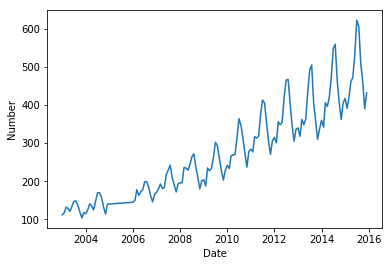

In [8]:
#plot
plt.xlabel("Date")
plt.ylabel("Number")
plt.plot(Idataset)

In [9]:
#rolling for 12 months
rolmean=Idataset.rolling(window=12).mean()
rolstd=Idataset.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
2003-01-01          NaN
2003-02-01          NaN
2003-03-01          NaN
2003-04-01          NaN
2003-05-01          NaN
2003-06-01          NaN
2003-07-01          NaN
2003-08-01          NaN
2003-09-01          NaN
2003-10-01          NaN
2003-11-01          NaN
2003-12-01   126.666667
2004-01-01   126.916667
2004-02-01   127.583333
2004-03-01   128.333333
2004-04-01   128.833333
2004-05-01   129.166667
2004-06-01   130.333333
2004-07-01   132.166667
2004-08-01   134.000000
2004-09-01   135.833333
2004-10-01   137.000000
2004-11-01   137.833333
2004-12-01   139.666667
2006-01-01   142.166667
2006-02-01   144.166667
2006-03-01   147.250000
2006-04-01   149.583333
2006-05-01   153.500000
2006-06-01   155.916667
...                 ...
2013-07-01   376.333333
2013-08-01   379.500000
2013-09-01   379.500000
2013-10-01   380.500000
2013-11-01   380.916667
2013-12-01   381.000000
2014-01-01   382.666667
2014-02-01   384.666667
2014-03-01   388

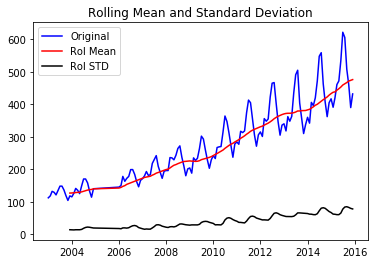

In [10]:
#Rolling Mean and Standard Deviation
orig=plt.plot(Idataset, color="blue", label="Original")
mean=plt.plot(rolmean, color="red", label="Rol Mean")
std=plt.plot(rolstd, color="black", label="Rol STD")
plt.legend(loc="best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

In [13]:
#Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print("Augmented Dickey Fuller Test")
dftest=adfuller(Idataset["#Passengers"], autolag="AIC")
dfoutput=pd.Series(dftest[0:4], index=["ADF Test Statistic", "P-Value", "#Lags", "#obs"])
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key] = value
print(dfoutput)

Augmented Dickey Fuller Test
ADF Test Statistic        0.815369
P-Value                   0.991880
#Lags                    13.000000
#obs                    130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


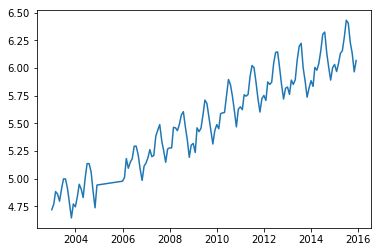

In [14]:
#Trend - Y value Changed
Idataset_log = np.log(Idataset)
plt.plot(Idataset_log)

In [17]:
Idataset_log.head(10)
Idataset_log.isnull().sum()

#Passengers    0
dtype: int64

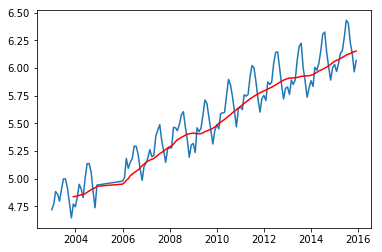

In [18]:
#Moving for 12 months
mavg=Idataset_log.rolling(window=12).mean()
mstd=Idataset_log.rolling(window=12).std()
plt.plot(Idataset_log)
plt.plot(mavg, color="red")

In [19]:
#remove Nan
Idataset_log_mvavg=Idataset_log-mavg
Idataset_log_mvavg.head(12)

,#Passengers
Month,
2003-01-01,NaN
2003-02-01,NaN
2003-03-01,NaN
2003-04-01,NaN
2003-05-01,NaN
2003-06-01,NaN
2003-07-01,NaN
2003-08-01,NaN
2003-09-01,NaN


In [20]:
#Remove NAN
Idataset_log_mvavg.dropna(inplace=True)
Idataset_log_mvavg.head(10)

,#Passengers
Month,
2003-12-01,-0.065494
2004-01-01,-0.093449
2004-02-01,-0.007566
2004-03-01,0.099416
2004-04-01,0.052142
2004-05-01,-0.027529
2004-06-01,0.139881
2004-07-01,0.260184
2004-08-01,0.248635


In [24]:
#ADF Test Function
def test_stats(timeseries):
    
    #rolling Statistic
    mavg=timeseries.rolling(window=12).mean()
    mstd=timeseries.rolling(window=12).std()
    
    #Plot
    #Rolling Mean and Standard Deviation
    orig=plt.plot(Idataset, color="blue", label="Original")
    mean=plt.plot(rolmean, color="red", label="Rol Mean")
    std=plt.plot(rolstd, color="black", label="Rol STD")
    plt.legend(loc="best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block=False)

    #Augmented Dickey Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print("Augmented Dickey Fuller Test")
    dftest=adfuller(Idataset["#Passengers"], autolag="AIC")
    dfoutput=pd.Series(dftest[0:4], index=["ADF Test Statistic", "P-Value", "#Lags", "#obs"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    print(dfoutput)

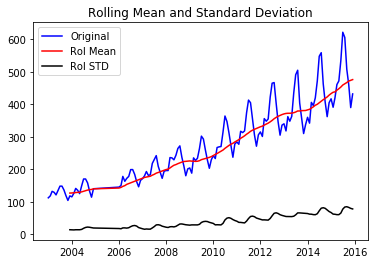

Augmented Dickey Fuller Test
ADF Test Statistic        0.815369
P-Value                   0.991880
#Lags                    13.000000
#obs                    130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [25]:
#plot
test_stats(Idataset_log_mvavg)

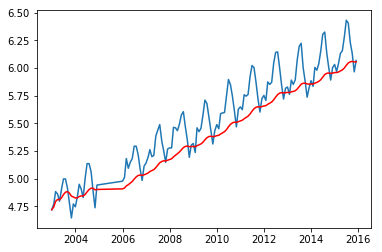

In [26]:
#Exponential Decay Weighted Avg
wavg=Idataset_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(Idataset_log)
plt.plot(wavg, color="red")

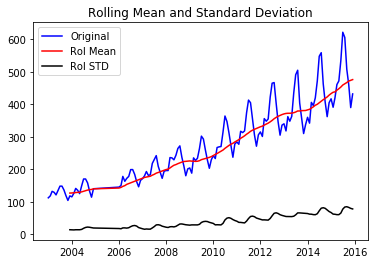

Augmented Dickey Fuller Test
ADF Test Statistic        0.815369
P-Value                   0.991880
#Lags                    13.000000
#obs                    130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [27]:
#dataset Scale - Wavg
d_avg=Idataset_log- wavg
test_stats(d_avg)

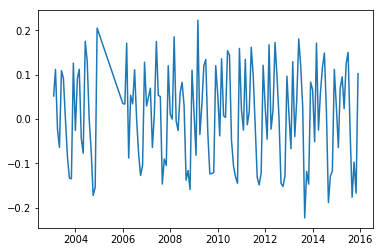

In [28]:
#check - D value - Intigrated
Idataset_log_diff=Idataset_log - Idataset_log.shift()
plt.plot(Idataset_log_diff)

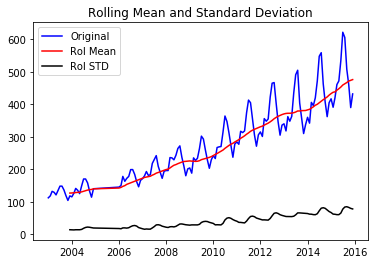

Augmented Dickey Fuller Test
ADF Test Statistic        0.815369
P-Value                   0.991880
#Lags                    13.000000
#obs                    130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


,#Passengers
Month,
2003-02-01,0.052186
2003-03-01,0.112117
2003-04-01,-0.022990
2003-05-01,-0.064022
2003-06-01,0.109484
2003-07-01,0.091937
2003-08-01,0.000000
2003-09-01,-0.084557
2003-10-01,-0.133531


In [29]:
#drop NAN and ADF Test
Idataset_log_diff.dropna(inplace=True)
test_stats(Idataset_log_diff)
Idataset_log_diff.head(10)

In [30]:
Idataset_log.dropna(inplace=True)

In [33]:
# #Model
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(Idataset_log)


trend = decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(Idataset_log, label="Original")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc="best")

decomlog=residual
decomlog.dropna(inplace=True)
test_stats(decomlog)

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

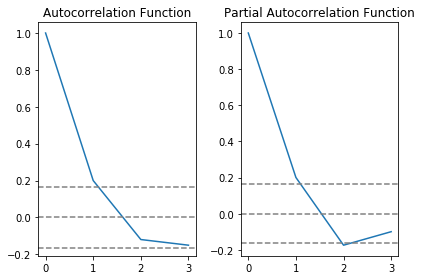

In [34]:
#acf & PACF
from statsmodels.tsa.stattools import acf, pacf
# Idataset_log_diff.fillna(Idataset_log_diff.mean())
lag_acf = acf(Idataset_log_diff, nlags=3)
lag_pacf = pacf(Idataset_log_diff, nlags=3, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Idataset_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Idataset_log_diff)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")

#Plot ACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Idataset_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Idataset_log_diff)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")

plt.tight_layout()



Plotting AR Model


D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


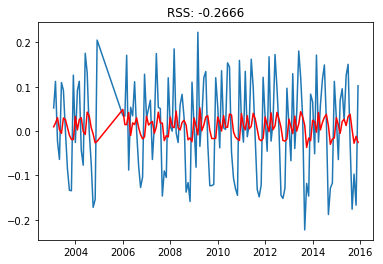

In [36]:
#Arima
from statsmodels.tsa.arima_model import ARIMA

#AR
model=ARIMA(Idataset_log, order=(1,1,0))
result_AR=model.fit(disp=-1)
plt.plot(Idataset_log_diff)
plt.plot(result_AR.fittedvalues, color="red")
plt.title("RSS: %.4F" %sum((result_AR.fittedvalues - Idataset_log_diff["#Passengers"]**2)))
print("Plotting AR Model")

D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting MA Model


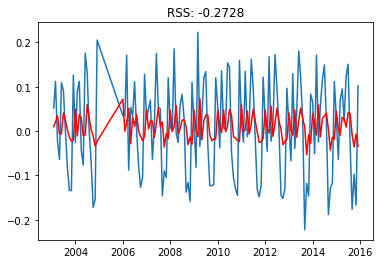

In [37]:
#MA
model=ARIMA(Idataset_log, order=(0,1,1))
result_MA=model.fit(disp=-1)
plt.plot(Idataset_log_diff)
plt.plot(result_MA.fittedvalues, color="red")
plt.title("RSS: %.4F" %sum((result_MA.fittedvalues - Idataset_log_diff["#Passengers"]**2)))
print("Plotting MA Model")

D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting ARIMA Model


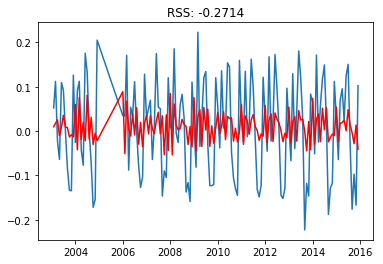

In [38]:
#ARIMA
model=ARIMA(Idataset_log, order=(1,1,1))
result_ARIMA=model.fit(disp=-1)
plt.plot(Idataset_log_diff)
plt.plot(result_ARIMA.fittedvalues, color="red")
plt.title("RSS: %.4F" %sum((result_ARIMA.fittedvalues - Idataset_log_diff["#Passengers"]**2)))
print("Plotting ARIMA Model")

In [39]:
pred_arima_diff=pd.Series(result_ARIMA.fittedvalues, copy=True)
print(pred_arima_diff.head())

Month
2003-02-01    0.009800
2003-03-01    0.017618
2003-04-01    0.025229
2003-05-01   -0.010225
2003-06-01    0.008528
dtype: float64


In [40]:
p_arima_diff_cumsum=pred_arima_diff.cumsum()
print(p_arima_diff_cumsum)

Month
2003-02-01    0.009800
2003-03-01    0.027418
2003-04-01    0.052648
2003-05-01    0.042422
2003-06-01    0.050950
2003-07-01    0.086575
2003-08-01    0.095633
2003-09-01    0.103530
2003-10-01    0.090341
2003-11-01    0.081932
2003-12-01    0.068990
2004-01-01    0.128939
2004-02-01    0.086748
2004-03-01    0.162395
2004-04-01    0.143654
2004-05-01    0.163477
2004-06-01    0.141585
2004-07-01    0.222638
2004-08-01    0.204508
2004-09-01    0.235428
2004-10-01    0.205073
2004-11-01    0.200308
2004-12-01    0.178626
2006-01-01    0.267539
2006-02-01    0.216846
2006-03-01    0.284526
2006-04-01    0.288294
2006-05-01    0.277042
2006-06-01    0.316500
2006-07-01    0.307638
                ...   
2013-07-01    1.156477
2013-08-01    1.183324
2013-09-01    1.183532
2013-10-01    1.139147
2013-11-01    1.160789
2013-12-01    1.118625
2014-01-01    1.192332
2014-02-01    1.162843
2014-03-01    1.189697
2014-04-01    1.228283
2014-05-01    1.204312
2014-06-01    1.255949
2014-

In [41]:
p_arima_log=pd.Series(Idataset_log["#Passengers"].ix[0], index=Idataset_log.index)
p_arima_log=p_arima_log.add(p_arima_diff_cumsum, fill_value=0)
p_arima_log.head()

D:\DS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
2003-01-01    4.718499
2003-02-01    4.728299
2003-03-01    4.745917
2003-04-01    4.771146
2003-05-01    4.760921
dtype: float64

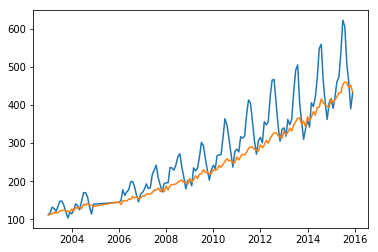

In [42]:
p_arima=np.exp(p_arima_log)
plt.plot(Idataset)
plt.plot(p_arima)

In [43]:
#Prediction
Idataset_log

,#Passengers
Month,
2003-01-01,4.718499
2003-02-01,4.770685
2003-03-01,4.882802
2003-04-01,4.859812
2003-05-01,4.795791
2003-06-01,4.905275
2003-07-01,4.997212
2003-08-01,4.997212
2003-09-01,4.912655


D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


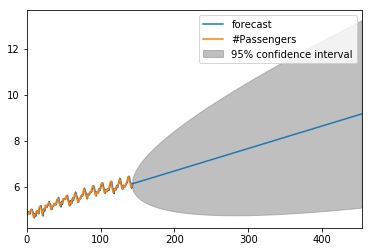

In [44]:
result_ARIMA.plot_predict(1,455)
x=result_ARIMA.forecast(steps=90)